In [12]:
import os
import pandas as pd

def get_parquet_files(root_folder):
    parquet_files = []
    for root, dirs, files in os.walk(root_folder):
        for file in files:
            if file.endswith(".parquet"):
                parquet_files.append(os.path.join(root, file))
    return parquet_files

root_folder = '../test/'
parquet_files = get_parquet_files(root_folder)
print(parquet_files)
df = pd.concat([pd.read_parquet(parquet_file) for parquet_file in parquet_files])

df.head()

['../test/order_datetime=2021-10-19/part-00003-b265e002-bffa-4201-a2a4-590ab25f4477.c000.snappy.parquet', '../test/order_datetime=2022-09-01/part-00005-bd1de064-b854-4ca3-9886-c1f7ca24ac73.c000.snappy.parquet', '../test/order_datetime=2021-08-12/part-00001-cfff5211-ef46-4b99-a6ed-63c9b2c7fe15.c000.snappy.parquet', '../test/order_datetime=2021-10-26/part-00003-b265e002-bffa-4201-a2a4-590ab25f4477.c000.snappy.parquet', '../test/order_datetime=2021-08-15/part-00001-cfff5211-ef46-4b99-a6ed-63c9b2c7fe15.c000.snappy.parquet', '../test/order_datetime=2022-09-06/part-00005-bd1de064-b854-4ca3-9886-c1f7ca24ac73.c000.snappy.parquet', '../test/order_datetime=2021-10-21/part-00003-b265e002-bffa-4201-a2a4-590ab25f4477.c000.snappy.parquet', '../test/order_datetime=2022-09-30/part-00005-bd1de064-b854-4ca3-9886-c1f7ca24ac73.c000.snappy.parquet', '../test/order_datetime=2021-08-23/part-00001-cfff5211-ef46-4b99-a6ed-63c9b2c7fe15.c000.snappy.parquet', '../test/order_datetime=2021-10-28/part-00003-b265e002

,user_id,merchant_abn,dollar_value,order_id
0,14938,19933438190,28.197762,9ac44c8f-815e-4a5d-817c-74ac53327afa
1,1,80324045558,19.917432,2c7b1606-d9f1-4eac-99f8-97abc979ab41
2,14938,50315283629,88.556866,18507390-268c-4dee-8d19-22c4cdf72b58
3,1,62170730910,100.929076,4fe7b08f-72bd-42fb-b2ae-407c3249de55
4,14938,20527255332,205.822861,d1c2a45c-c0e2-4d25-9054-36c945b9a225


In [44]:
merchants = pd.read_parquet('../data/raw/tbl_merchants.parquet')
merchants.head()
print(merchants['tags'].iloc[0])

((furniture, home furnishings and equipment shops, and manufacturers, except appliances), (e), (take rate: 0.18))


In [47]:
import pandas as pd

merchants = pd.read_parquet('../data/raw/tbl_merchants.parquet')

def split_tags(tag):
    if isinstance(tag, str):
        tag = tag.replace('(', '[').replace(')', ']') 
        parts = tag.split('], [') 

        parts = [p.strip('[]') for p in parts]
        
        if len(parts) == 3:
            category = parts[0].strip()
            revenue_rate = parts[1].strip()
            take_rate = parts[2].strip()
            return category, revenue_rate, take_rate
        
    return None, None, None

merchants[['category', 'revenue_rate', 'take_rate']] = merchants['tags'].apply(lambda x: pd.Series(split_tags(x)))

print(merchants[['category', 'revenue_rate', 'take_rate']].head())

                                                       category revenue_rate  \
merchant_abn                                                                   
10023283211   furniture, home furnishings and equipment shop...            e   
10142254217   cable, satellite, and otHer pay television and...            b   
10165489824         jewelry, watch, clock, and silverware shops            b   
10187291046              wAtch, clock, and jewelry repair shops            b   
10192359162   music shops - musical instruments, pianos, and...            a   

                    take_rate  
merchant_abn                   
10023283211   take rate: 0.18  
10142254217   take rate: 4.22  
10165489824   take rate: 4.40  
10187291046   take rate: 3.29  
10192359162   take rate: 6.33  


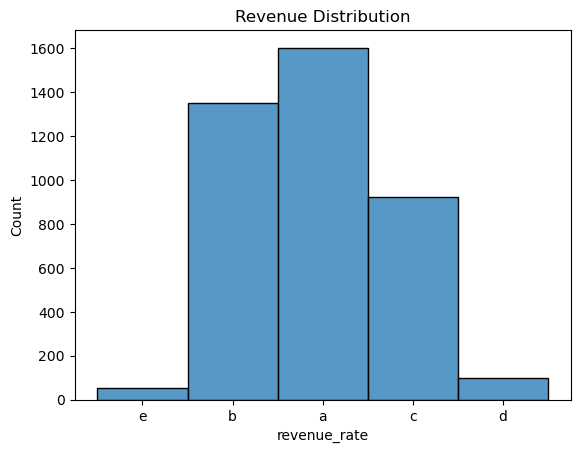

name            0
tags            0
category        0
revenue_rate    0
take_rate       0
dtype: int64
user_id         0
merchant_abn    0
dollar_value    0
order_id        0
dtype: int64
user_id        0
consumer_id    0
dtype: int64


In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(merchants['revenue_rate'], bins=20)
plt.title('Revenue Distribution')
plt.show()

print(merchants.isnull().sum())
print(df.isnull().sum())
print(consumers.isnull().sum())

In [10]:
consumers = pd.read_parquet('../data/raw/consumer_user_details.parquet')
consumers.head()

,user_id,consumer_id
0,1,1195503
1,2,179208
2,3,1194530
3,4,154128
4,5,712975


In [13]:
print(merchants.info())
print(df.info())
print(consumers.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4026 entries, 10023283211 to 99990536339
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    4026 non-null   object
 1   tags    4026 non-null   object
dtypes: object(2)
memory usage: 94.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 14195505 entries, 0 to 17168
Data columns (total 4 columns):
 #   Column        Dtype  
---  ------        -----  
 0   user_id       int64  
 1   merchant_abn  int64  
 2   dollar_value  float64
 3   order_id      object 
dtypes: float64(1), int64(2), object(1)
memory usage: 541.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499999 entries, 0 to 499998
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   user_id      499999 non-null  int64
 1   consumer_id  499999 non-null  int64
dtypes: int64(2)
memory usage: 7.6 MB
None
